In [1]:
import numpy as np

import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay

import plotUtils as plotUtils

import matplotlib.pyplot as plt
%matplotlib inline

afwDisplay.setDefaultBackend("matplotlib")

In [2]:
detectorOrder = [6, 7, 8, 3, 4, 5, 0, 1, 2]

# dataType = "bias"; cmap = "viridis"; histColor = "tab:green"
# dataType = "dark"; cmap = "magma"; histColor = "darkmagenta"
dataType = "flat"; cmap = "plasma"; histColor = "orangered"

n0_vs_n1 = False
n0_vs_n2 = False
n0_vs_n3 = False
n1_vs_n0 = False
n1_vs_n1 = False
n2_vs_n1 = False
n3_vs_n1 = True
n3_vs_n2 = False

if n0_vs_n1:
    expId = 2020070800001
    calibButler = dafPersist.Butler("/project/shared/comCam/")
    dataFile = calibButler.getUri("bias", dataId={'expId': expId, 'detector': 8})
    groupId2 = "20200727" #  _2114"
    expId2 = 2020072700001
    calib2 = "CALIB" + "_" + groupId2
    calibButler2 = dafPersist.Butler(root="/project/shared/comCam/", calibRoot="/project/shared/comCam/" + calib2)
    dataFile2 = calibButler2.getUri("bias", dataId={'expId': expId2, 'detector': 8})
    print("{}: n0 ({}) versus n1 ({})".format(dataType, "/project/shared/comCam/", groupId2))
if n0_vs_n2:
    expId = 2020070800001
    calibButler = dafPersist.Butler("/project/shared/comCam/")
    dataFile = calibButler.getUri("bias", dataId={'expId': expId, 'detector': 8})
    groupId2 = "20200728"  #_1920"
    expId2 = 2020072800035
    calib2 = "CALIB" + "_" + groupId
    calibButler2 = dafPersist.Butler(root="/project/shared/comCam/", calibRoot="/project/shared/comCam/" + calib2)
    dataFile2 = calibButler2.getUri("bias", dataId={'expId': expId2, 'detector': 8})
    print("{}: n0 ({}) versus n2 ({})".format(dataType, "/project/shared/comCam/", groupId2))
if n0_vs_n3:
    expId = 2020070800001
    calibButler = dafPersist.Butler("/project/shared/comCam/")
    dataFile = calibButler.getUri("bias", dataId={'expId': expId, 'detector': 8})
    groupId2 = "20200729"  # _1847"
    expId2 = 2020072900001
    calib2 = "CALIB"
    calibButler2 = dafPersist.Butler(root="/project/shared/comCam/", calibRoot="/project/shared/comCam/" + calib2)
    dataFile2 = calibButler2.getUri("bias", dataId={'expId': expId2, 'detector': 8})
    print("{}: n0 ({}) versus n3 ({})".format(dataType, "/project/shared/comCam/", groupId2))
if n1_vs_n0:
    groupId = "20200727"  # _2114"
    expId = 2020072700001
    calib = "CALIB" + "_" + groupId
    calibButler = dafPersist.Butler(root="/project/shared/comCam/", calibRoot="/project/shared/comCam/" + calib)
    dataFile = calibButler.getUri("bias", dataId={'expId': expId, 'detector': 8})
    expId2 = 2020070800001
    calibButler2 = dafPersist.Butler("/project/shared/comCam/")
    dataFile = calibButler2.getUri("bias", dataId={'expId': expId2, 'detector': 8})
    print("{}: n1 ({}) versus n0 ({})".format(dataType, groupId, "/project/shared/comCam/"))
if n1_vs_n1:
    groupId = "20200727"
    expId = 2020072700001
    groupId2 = "20200727"
    expId2 = 2020072700001
    print("{}: n1 ({}) versus n1 ({})".format(dataType, groupId, groupId2))
if n2_vs_n1:
    groupId = "20200728"  #_1920"
    expId = 2020072800035
    groupId2 = "20200727"  # _2114"
    expId2 = 2020072700001
    calib = "CALIB" + "_" + groupId
    calib2 = "CALIB" + "_" + groupId2
    print("{}: n2 ({}) versus n1 ({})".format(dataType, groupId, groupId2))
if n3_vs_n1:
    groupId = "20200729"  # _1847"
    expId = 2020072900001
    groupId2 = "20200727"  # _2114"
    expId2 = 2020072700035
    calib = "CALIB"
    calib2 = "CALIB" + "_" + groupId2
    print("{}: n3 ({}) versus n1 ({})".format(dataType, groupId, groupId2))
if n3_vs_n2:
    groupId = "20200729"  # _1847"
    expId = 2020072900001
    groupId2 = "20200728"  # _1920"
    expId2 = 2020072800035
    calib = "CALIB"
    calib2 = "CALIB" + "_" + groupId2
    print("{}: n3 ({}) versus n2 ({}) ".format(dataType, groupId, groupId2))

# rerun = "CALSET_" + groupId
# rerun2 = "CALSET_" + groupId2
calib = "CALIB"
calib2 = "CALIB"

flat: n3 (20200729) versus n1 (20200727)


In [3]:
rootDir = "/project/shared/comCam/"
if not n0_vs_n1 and not n0_vs_n2 and not n0_vs_n3 and not n1_vs_n0:
    # rerunDir = rootDir + "rerun/" + rerun
    # rerunDir2 = rootDir + "rerun/" + rerun2
    calibDir = "/project/shared/comCam/" + calib
    calibDir2 = "/project/shared/comCam/" + calib2
    print(calibDir)
    print(calibDir2)
    calibButler = dafPersist.Butler(root=rootDir, calibRoot=calibDir)
    calibButler2 = dafPersist.Butler(root=rootDir, calibRoot=calibDir2)

/project/shared/comCam/CALIB
/project/shared/comCam/CALIB


In [4]:
dataFile = calibButler.getUri(dataType, dataId={'expId': expId, 'detector': 8})
fileUsedDir = dataFile[len(rootDir): dataFile.rfind("/" + dataType)]
dataFile2 = calibButler2.getUri(dataType, dataId={'expId': expId2, 'detector': 8})
fileUsedDir2 = dataFile2[len(rootDir): dataFile2.rfind("/" + dataType)]
print("dataFile: ", dataFile)
print("dataFile2:", dataFile2)

dataFile:  /project/shared/comCam/CALIB/flat/r/2020-07-29/flat_r-R22-S22-det008_2020-07-29.fits
dataFile2: /project/shared/comCam/CALIB/flat/r/2020-07-27/flat_r-R22-S22-det008_2020-07-27.fits


/software/lsstsw/stack_20200515/python/miniconda3-4.7.12/envs/lsst-scipipe/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


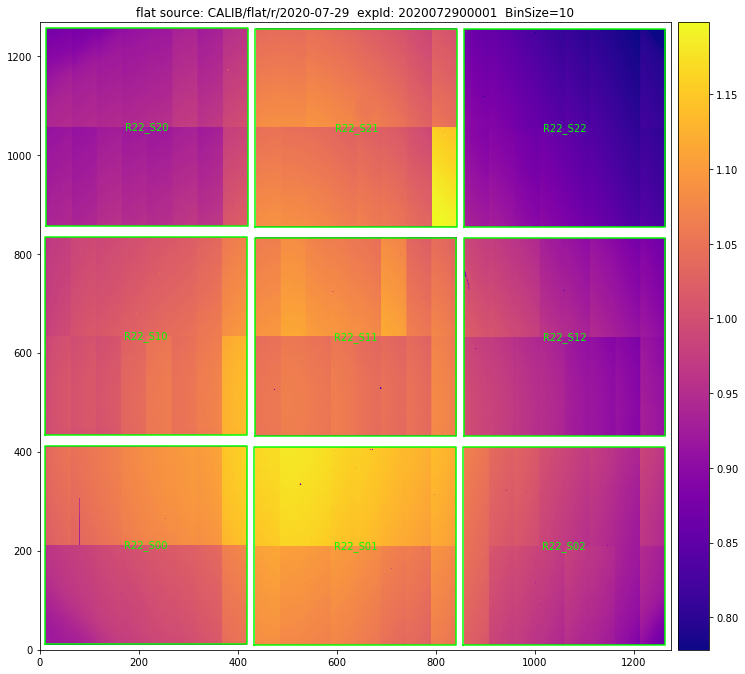

In [5]:
# Plot camera image
plotUtils.plotShowCamera(calibButler, expId, dataType, cmap=cmap, fileUsedDir=fileUsedDir, figureSideSize=12)

/software/lsstsw/stack_20200515/python/miniconda3-4.7.12/envs/lsst-scipipe/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


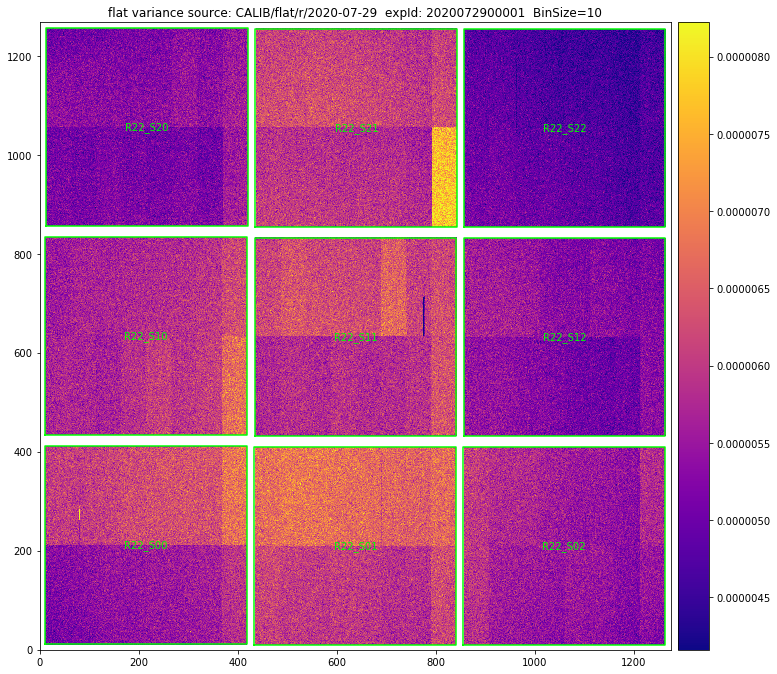

In [6]:
# Plot variance image
plotUtils.plotShowCamera(calibButler, expId, dataType, cmap=cmap, doVariance=True, fileUsedDir=fileUsedDir)

/software/lsstsw/stack_20200515/python/miniconda3-4.7.12/envs/lsst-scipipe/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


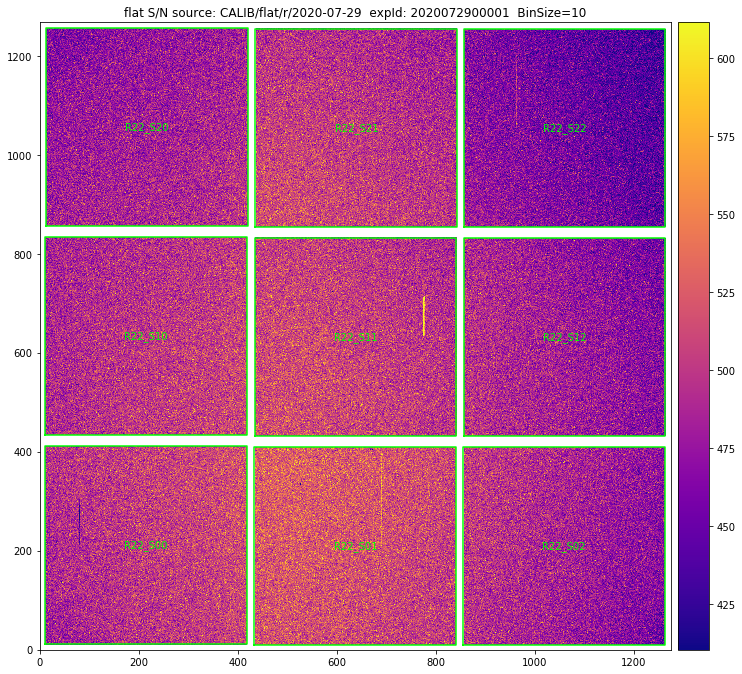

In [7]:
# Plot S/N image
plotUtils.plotShowCamera(calibButler, expId, dataType, cmap=cmap, doSignalToNoise=True, fileUsedDir=fileUsedDir)

saturationList =  [142857.0, 142857.0, 142857.0, 142857.0, 142857.0, 142857.0, 142857.0, 142857.0, 142857.0]

det    min        max      median    mean    stddev      var
 0     0.105      2.173   0.9390   0.9413   0.0262    0.0007
 1     0.290      3.870   1.0513   1.0554   0.0394    0.0016
 2     0.021      1.504   0.8467   0.8485   0.0377    0.0014
 3     0.130      4.163   1.0265   1.0325   0.0392    0.0015
 4     0.028      6.915   1.0616   1.0636   0.0246    0.0006
 5     0.010      1.481   0.9349   0.9395   0.0365    0.0013
 6     0.002      4.696   1.0410   1.0380   0.0554    0.0031
 7     0.058      6.765   1.1087   1.1110   0.0434    0.0019
 8     0.003      6.808   0.9711   0.9754   0.0409    0.0017


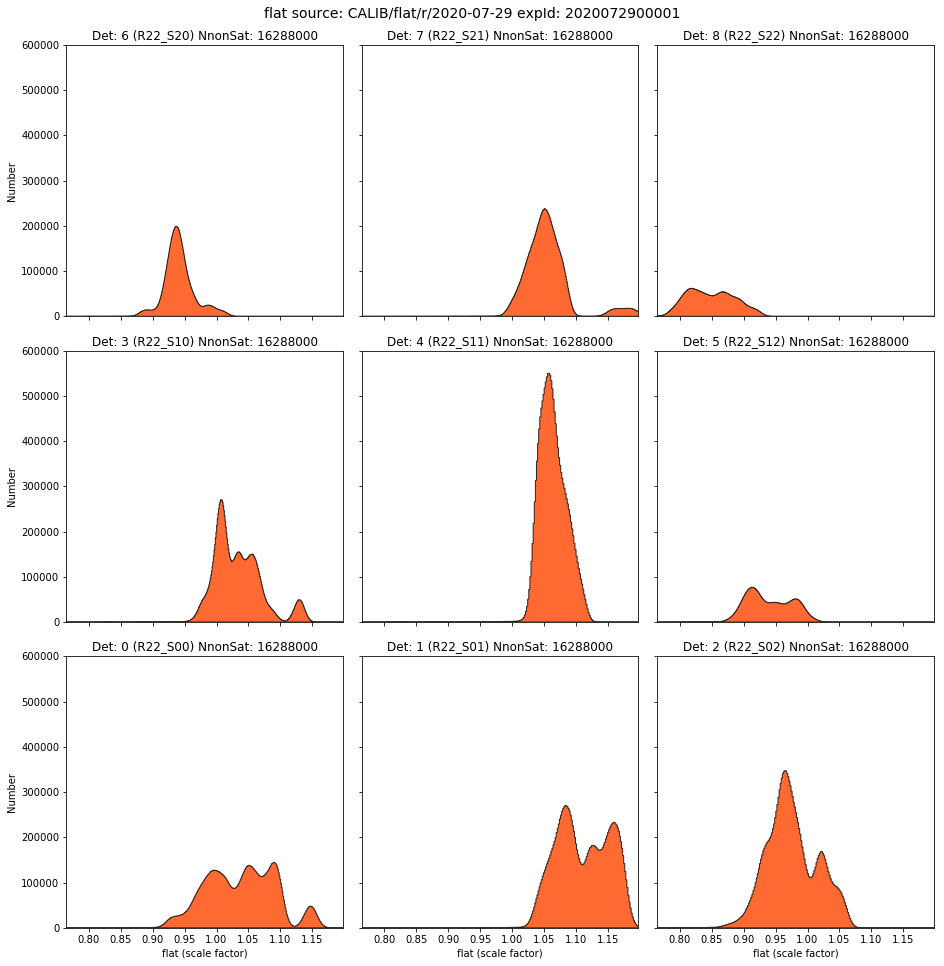

In [8]:
# Plot distributions and stats
plotUtils.plotHists(expId, calibButler, dataType, histColor=histColor, detectorOrder=detectorOrder,
                    fileUsedDir=fileUsedDir)

/software/lsstsw/stack_20200515/python/miniconda3-4.7.12/envs/lsst-scipipe/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


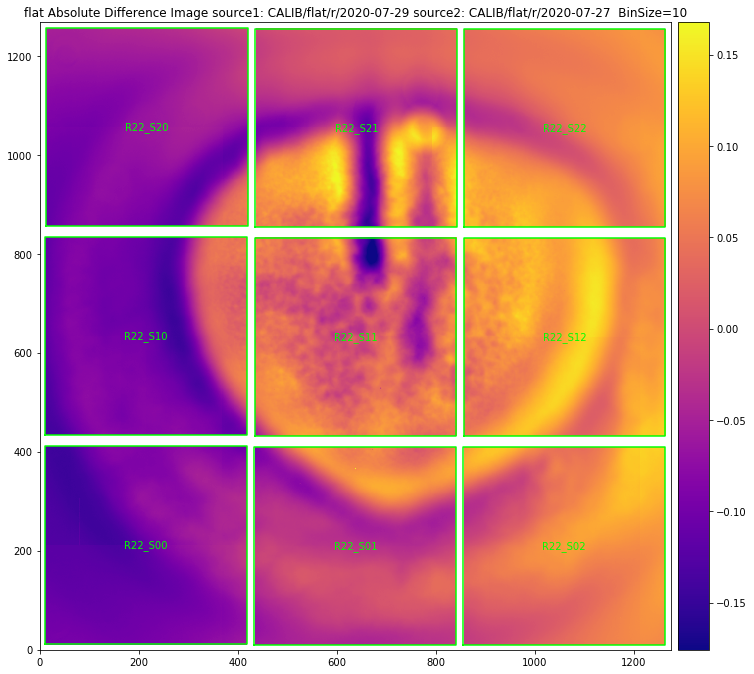

In [9]:
# Plot absolute difference image
plotUtils.plotShowCamera(calibButler, expId, dataType, butler2=calibButler2, expId2=expId2, cmap=cmap,
                         doDiffIm=True, fileUsedDir=fileUsedDir, fileUsedDir2=fileUsedDir2)

/software/lsstsw/stack_20200515/python/miniconda3-4.7.12/envs/lsst-scipipe/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


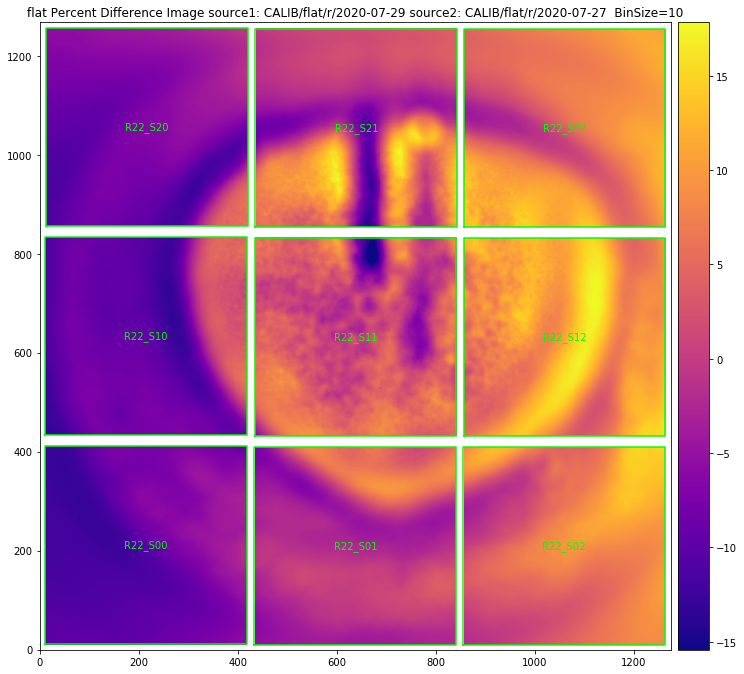

In [10]:
# Plot percent difference image
plotUtils.plotShowCamera(calibButler, expId, dataType, butler2=calibButler2, expId2=expId2, cmap=cmap,
                         doPercentDiffIm=True, fileUsedDir=fileUsedDir, fileUsedDir2=fileUsedDir2)

det      min         max      median    mean    stddev      var
 0    -0.156      0.077  -0.0698  -0.0668   0.0314    0.0010
 1    -0.169      0.291   0.0166   0.0215   0.0640    0.0041
 2    -0.067      0.158   0.0602   0.0576   0.0325    0.0011
 3    -1.201      0.083  -0.0921  -0.0761   0.0528    0.0028
 4    -1.355      1.140   0.0313   0.0252   0.0423    0.0018
 5    -0.134      0.184   0.0878   0.0883   0.0295    0.0009
 6    -0.650      0.019  -0.0972  -0.0949   0.0289    0.0008
 7    -0.578      5.662  -0.0120  -0.0044   0.0418    0.0017
 8    -0.055      5.893   0.0570   0.0555   0.0368    0.0014


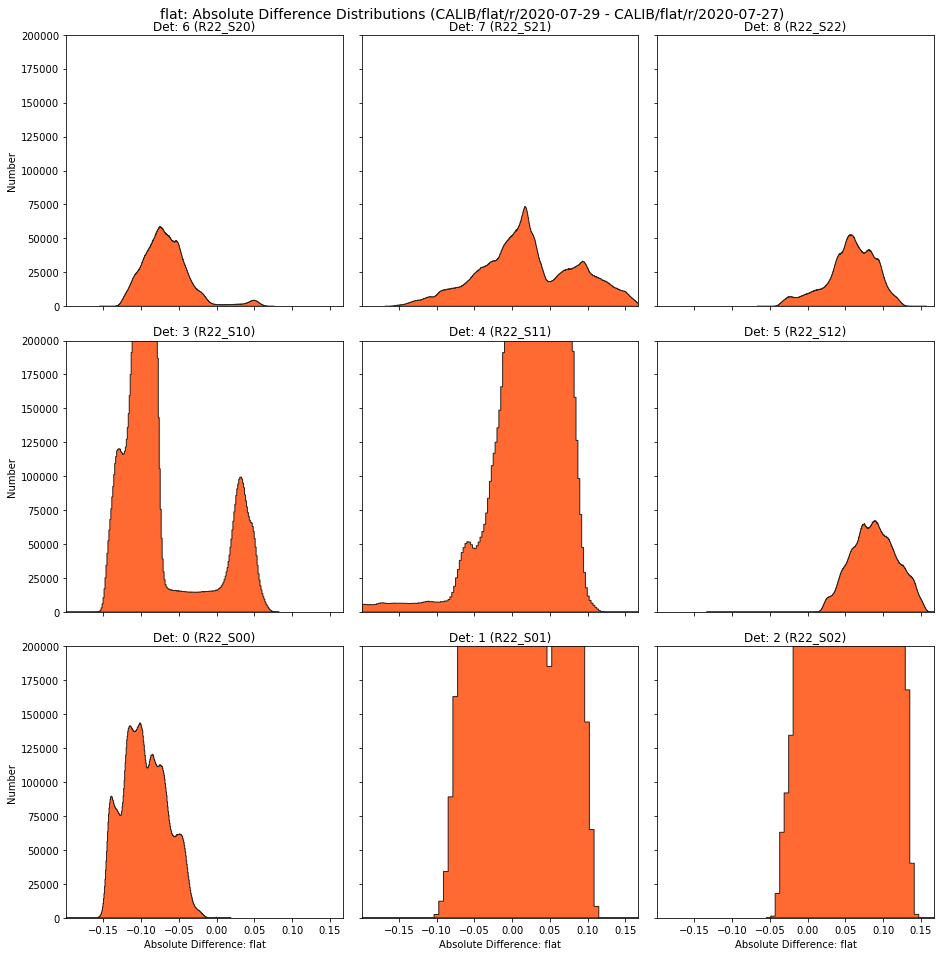

In [11]:
# Plot absolute difference distributions and stats 
plotUtils.plotDiffHists(expId, calibButler, expId2, calibButler2, dataType, histColor=histColor,
                        detectorOrder=detectorOrder, fileUsedDir=fileUsedDir, fileUsedDir2=fileUsedDir2)

det      min         max      median    mean    stddev      var
 0      -14.02       14.62    -7.20    -6.83     3.15        9.91
 1      -14.76       19.12     1.61     2.22     6.17       38.11
 2      -16.58       21.70     7.55     7.13     3.98       15.85
 3      -25.21        7.52    -8.65    -7.09     4.92       24.17
 4     -135.67       37.19     2.98     2.48     3.98       15.86
 5      -20.99       30.36     9.82     9.94     3.50       12.27
 6      -58.82       29.44    -9.25    -8.80     2.75        7.57
 7      -71.01      143.94    -1.09    -0.33     3.72       13.86
 8       -8.57      152.60     6.08     6.02     4.07       16.53


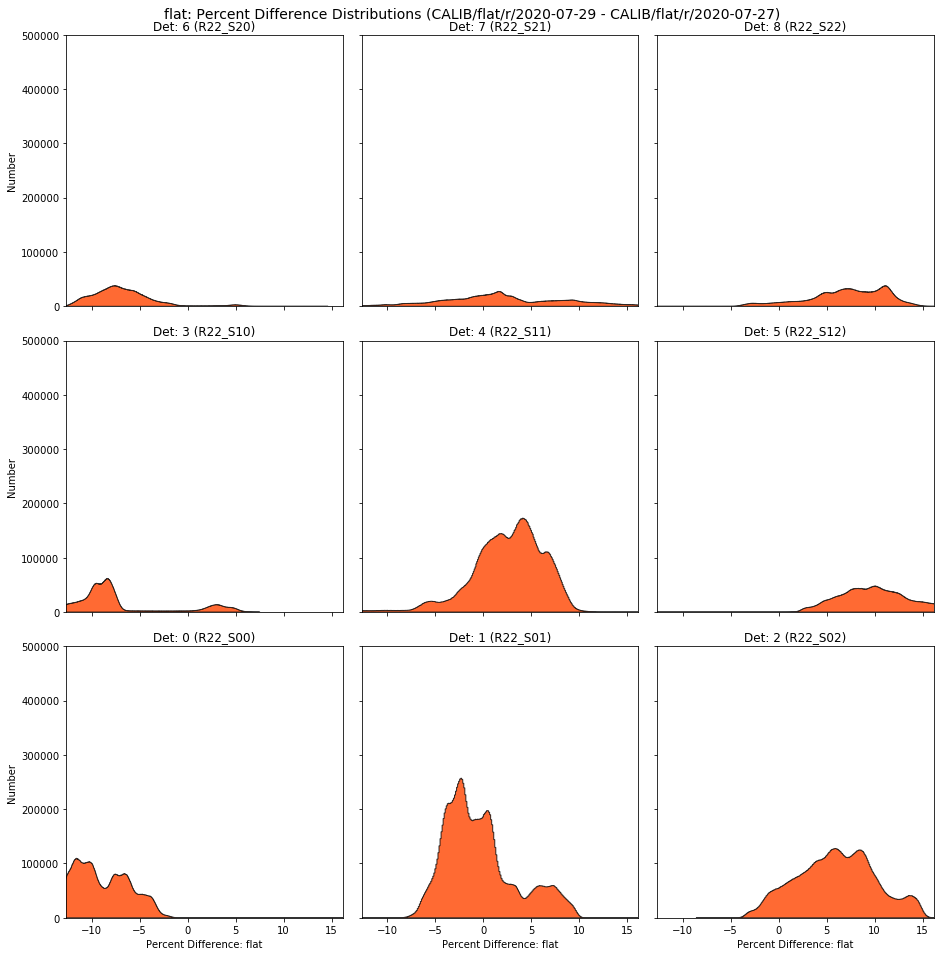

In [12]:
# Plot percent difference distributions and stats 
plotUtils.plotDiffHists(expId, calibButler, expId2, calibButler2, dataType, histColor=histColor,
                        detectorOrder=detectorOrder, doPercentDiff=True, fileUsedDir=fileUsedDir,
                        fileUsedDir2=fileUsedDir2)

In [ ]:
# Plot addition of two images
plotUtils.plotShowCamera(calibButler, expId, dataType, dataType2="bias", butler2=calibButler2, expId2=expId2,
                         cmap=cmap, doAddIm=True, fileUsedDir=fileUsedDir, fileUsedDir2=fileUsedDir2)

In [ ]:
# Plot addition then subtraction of three images: darkA - biasB + biasA
plotUtils.plotShowCamera(calibButler, expId, dataType, dataType2="bias", butler2=calibButler2, expId2=expId2,
                         dataType3="bias", butler3=calibButler, expId3=expId,
                         cmap=cmap, doAddThenSubtractIm=True, fileUsedDir=fileUsedDir, fileUsedDir2=fileUsedDir2)

In [ ]:
# Plot addition then subtraction of three images: darkA - biasA + biasB
plotUtils.plotShowCamera(calibButler, expId, dataType, dataType2="bias", butler2=calibButler, expId2=expId,
                         dataType3="bias", butler3=calibButler2, expId3=expId2,
                         cmap=cmap, doAddThenSubtractIm=True, fileUsedDir=fileUsedDir, fileUsedDir2=fileUsedDir2)